#### You recently bought an ice cream truck since you predict that global warming will continue to drive temperatures up, alongside demand for ice cream. Here we are going to predict the ice cream sales based on the outside air temperature. 

**Dataset:**

**X:** Outside Air Temperature

**Y:** Overall Revenue Generated in dollars.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**You can see below we have a very simple CSV file with only two columns**

In [35]:
sales_df = pd.read_csv('IceCreamData.csv') #read the data from csv
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


**Lets go ahead and perform some very basic data visualisation**

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

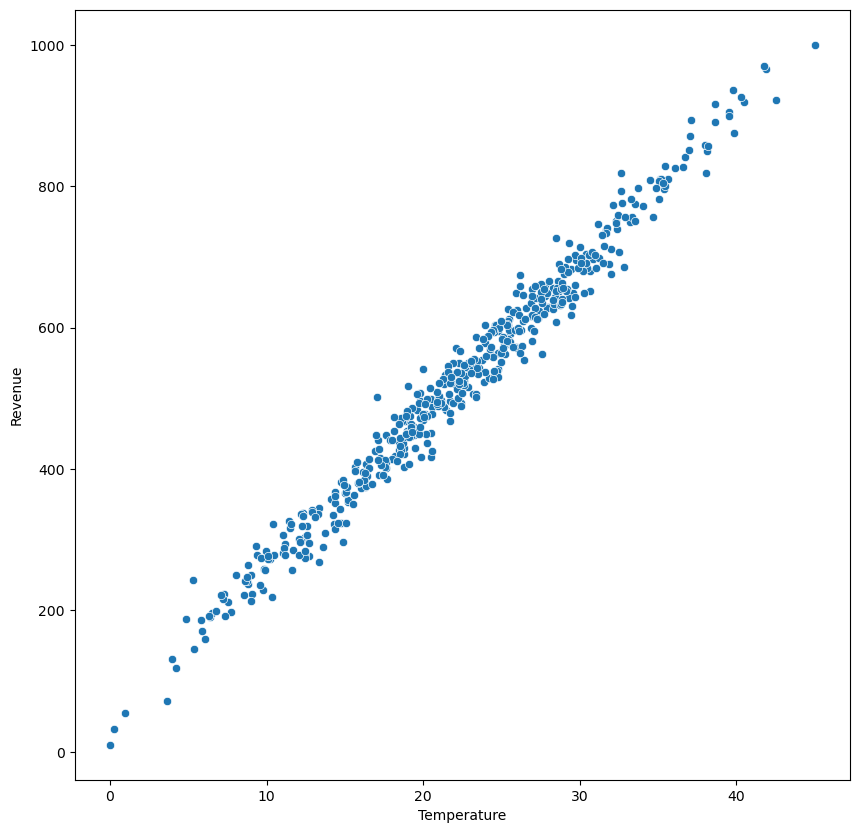

In [36]:
plt.figure(figsize= (10, 10)) #define chart size
sns.scatterplot(x = 'Temperature', y = 'Revenue', data = sales_df) #refers to col names

**This graph is lovely, but since we are applying linear regression then lets use one of seaborn's inbuilt functions to help us with this**

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

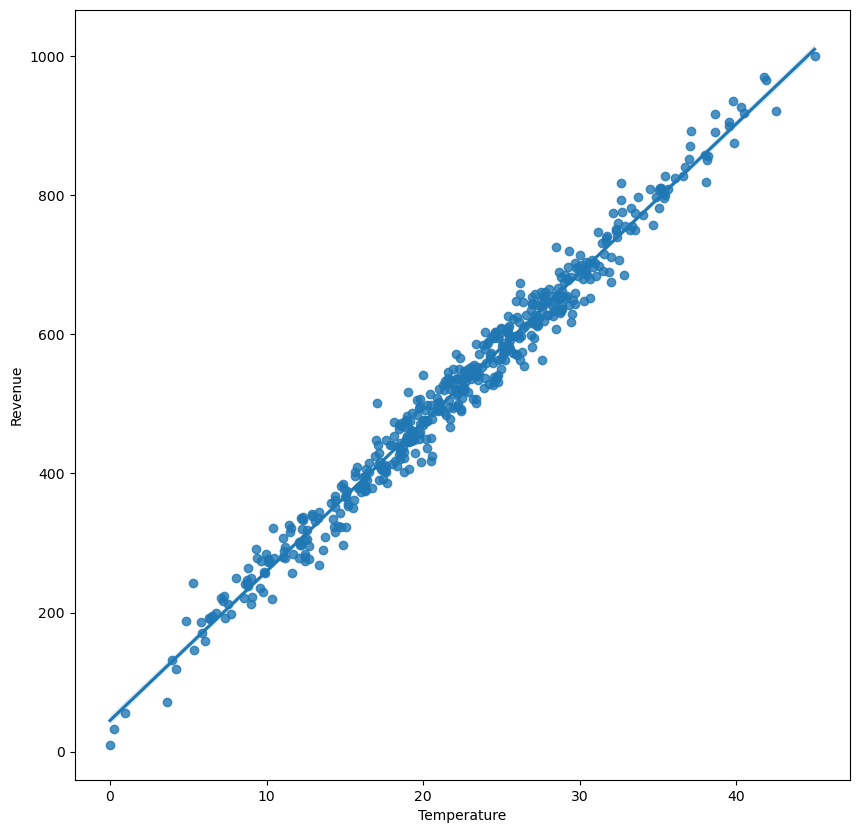

In [37]:
plt.figure(figsize= (10, 10))
sns.regplot(x = 'Temperature', y = 'Revenue', data = sales_df) #regplot gives us a nice line through the plots

**Lets use that fancy scikit library we imported to split our data so that we can train and test our date**

In [38]:
X = sales_df['Temperature']
y = sales_df['Revenue']
#defines x and y

In [39]:
X = np.array(X)
y = np.array(y)
# converting to array type

In [40]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
#reshape so that we can apply it to our model

In [41]:
from sklearn.model_selection import train_test_split #this makes the training very easy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) #set the test size to 40% 

**Lets train a simple model in scikit learn**

In [42]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept= True)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression()

In [43]:
m = SimpleLinearRegression.coef_
b = SimpleLinearRegression.intercept_
print(m)
print(b)
#m and b refers to the actual formula for linear regression y = mX + b

[[21.47214588]]
[43.66226467]


**Now lets evalute the trained model in scikit learn**

Text(0.5, 1.0, 'Revenue Generated Based on Temperature')

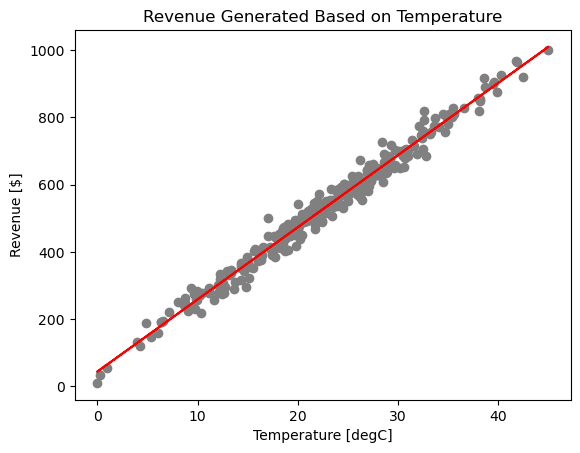

In [44]:
plt.scatter(X_train, y_train, color= 'gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color='r')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated Based on Temperature')

**Lets find the accuracy for our model with the training data**

In [45]:
accuracy_training_train = SimpleLinearRegression.score(X_train, y_train)
print(accuracy_training_train)

0.9817754282487187


Text(0.5, 1.0, 'Revenue Generated Based on Temperature')

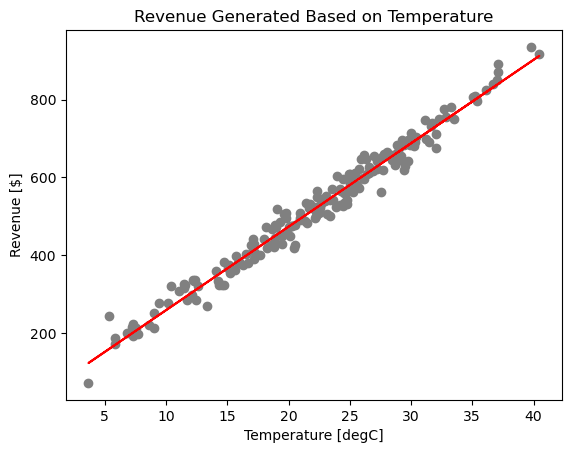

In [49]:
plt.scatter(X_test, y_test, color= 'gray')
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color='r')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated Based on Temperature')

In [50]:
accuracy_training_test = SimpleLinearRegression.score(X_test, y_test)
print(accuracy_training_test) #.97 is pretty good but this is also a really simple data set

0.9758336801666989


**Lets see what our y hat will be if we give the model some temperatures**

In [53]:
random_test = np.array([40.5]) #change this value to your chosen temp
random_test = random_test.reshape(-1, 1)
random_revenue = SimpleLinearRegression.predict(random_test)
print('Revenue Predictions:', random_revenue)

Revenue Predictions: [[913.28417292]]
